<a href="https://colab.research.google.com/github/Matheusavilap/CodigosPhyton/blob/main/Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

# Carregar os dados
df = pd.read_csv('BankChurners.csv')


In [ ]:
# Explorar a estrutura do conjunto de dados
print(df.info())
print(df.describe())

# Verificar se há dados duplicados
df = df.drop_duplicates()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
# Identificar valores ausentes
print(df.isnull().sum())

# Preencher ou remover valores ausentes
#df = df.fillna(df.median())


CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [ ]:
# Verificar e corrigir inconsistências nos dados
df['Income_Category'] = df['Income_Category'].replace('Unknown', np.nan)
df['Education_Level'] = df['Education_Level'].replace('Unknown', np.nan)
df = df.dropna()

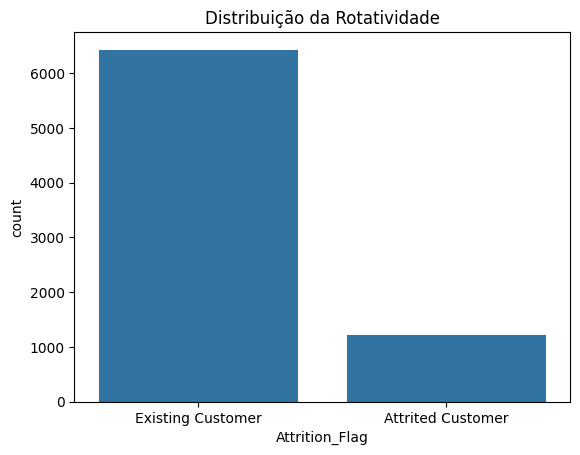

In [ ]:
# Distribuição da rotatividade (churn)
sns.countplot(x='Attrition_Flag', data=df)
plt.title('Distribuição da Rotatividade')
plt.show()

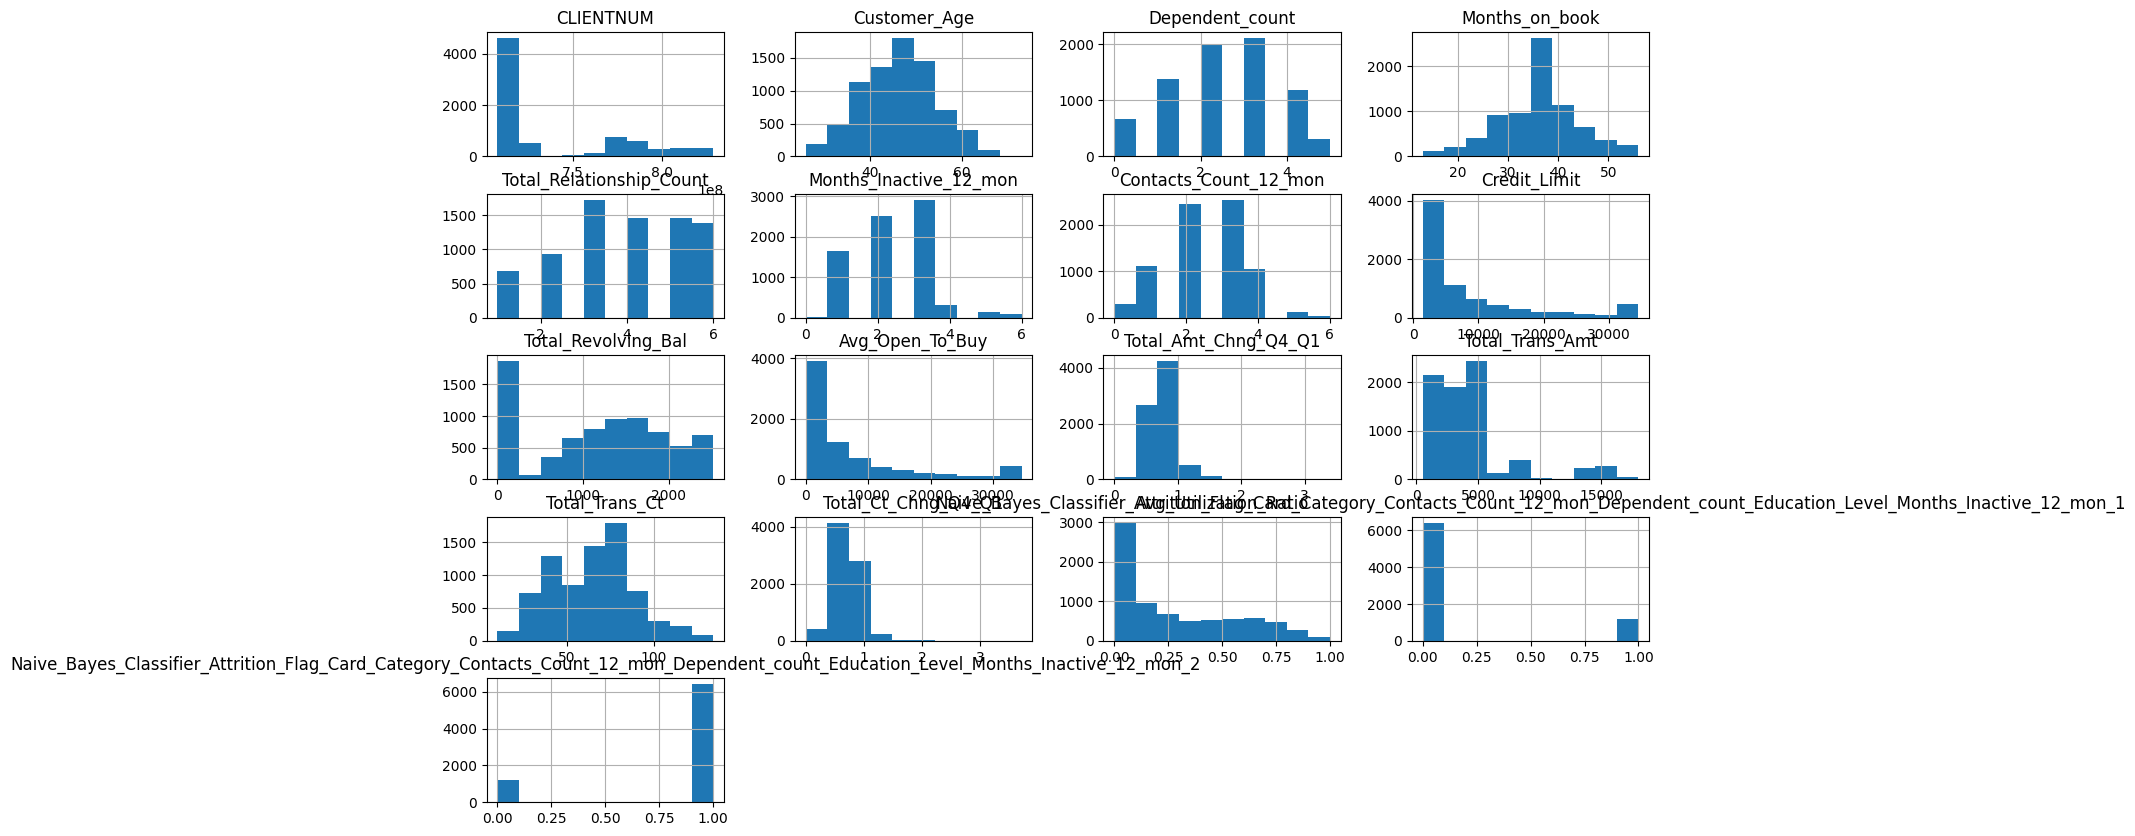

In [ ]:
# Distribuição de variáveis independentes
df.hist(figsize=(15, 10))
plt.show()

In [ ]:
# Codificação de variáveis categóricas
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])
df['Education_Level'] = le.fit_transform(df['Education_Level'])
df['Income_Category'] = le.fit_transform(df['Income_Category'])
df['Card_Category'] = le.fit_transform(df['Card_Category'])


In [ ]:
# Codificação de variáveis categóricas
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])
df['Education_Level'] = le.fit_transform(df['Education_Level'])
df['Income_Category'] = le.fit_transform(df['Income_Category'])
df['Card_Category'] = le.fit_transform(df['Card_Category'])


In [ ]:
# Dividir os dados em conjuntos de treinamento e teste
X = df.drop(['Attrition_Flag', 'CLIENTNUM'], axis=1)
y = df['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Aplicação do SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [ ]:
# Selecionar e treinar o modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train_res, y_train_res)


RandomForestClassifier(random_state=42)

Acurácia: 1.0
Relatório de Classificação:
                   precision    recall  f1-score   support

Attrited Customer       1.00      1.00      1.00       254
Existing Customer       1.00      1.00      1.00      1275

         accuracy                           1.00      1529
        macro avg       1.00      1.00      1.00      1529
     weighted avg       1.00      1.00      1.00      1529



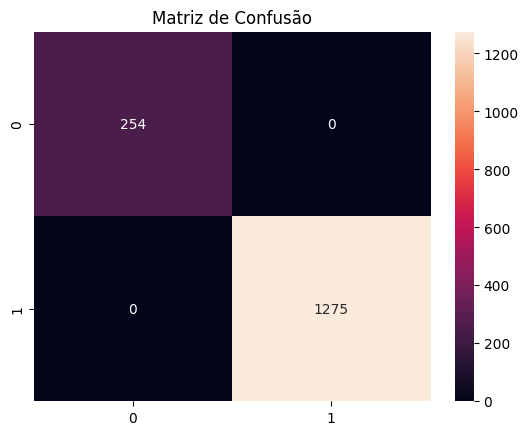

In [ ]:
# Previsões e avaliação do modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Acurácia:', accuracy)

print('Relatório de Classificação:')
print(classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Matriz de Confusão')
plt.show()



In [ ]:
# Curva ROC e AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Converter String para y_test numerica
y_test_numeric = y_test.replace({'Existing Customer': 0, 'Attrited Customer': 1})


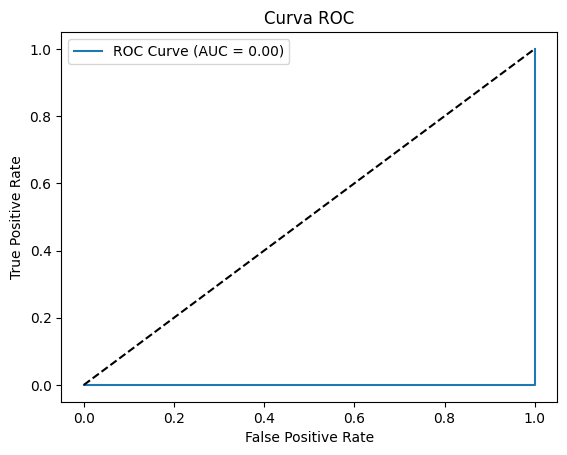

In [ ]:

fpr, tpr, _ = roc_curve(y_test_numeric, y_pred_proba)
roc_auc = roc_auc_score(y_test_numeric, y_pred_proba)  e

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()


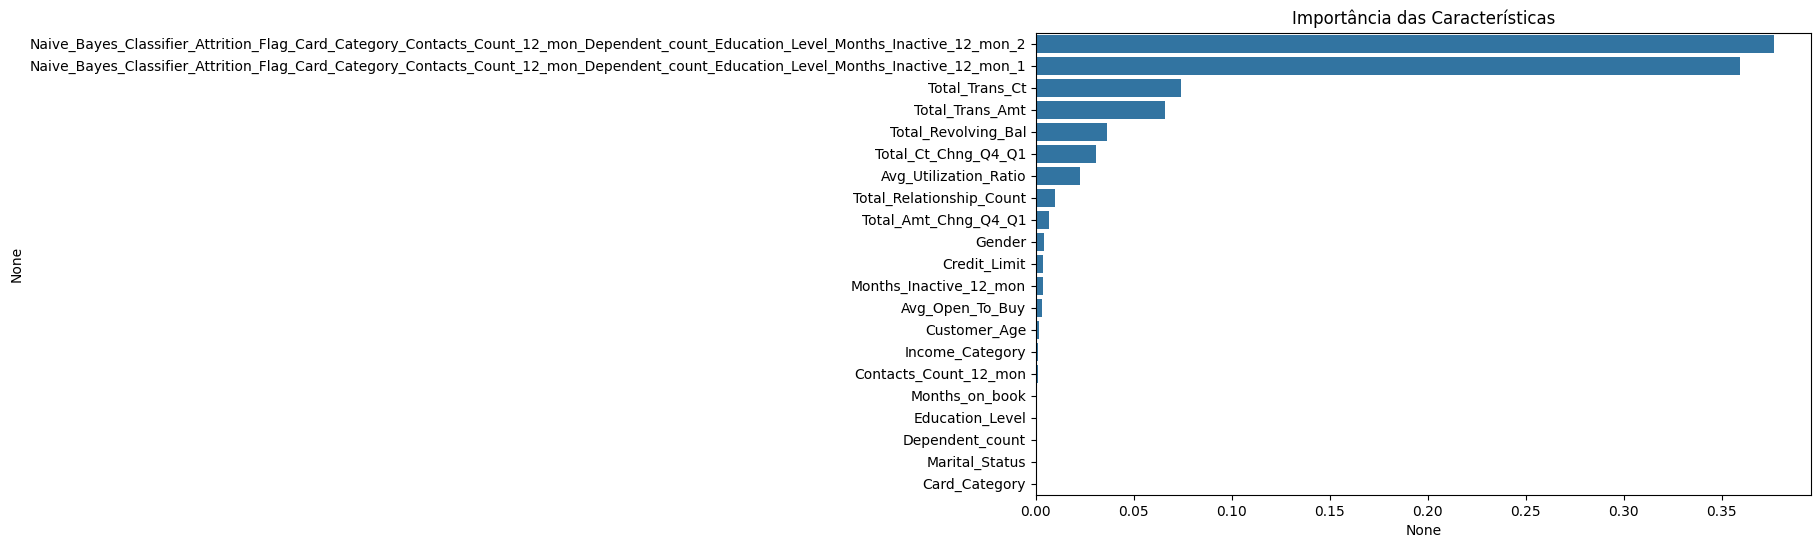

In [ ]:
importances = model.feature_importances_
features_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=features_importances, y=features_importances.index)
plt.title('Importância das Características')
plt.show()